#Task 1: Define the Problem

Determine if a user clicked on the ad based on the data by creating a Logistic Regression model. 

#Task 2a: Install the Needed Libraries

In [1]:
#pass

#Task 2b: Import the Needed Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Task 3: Load the Data

In [3]:
ad_data = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/advertising.csv')

#Task 4: Perform Data Exploratory Analysis (EDA)

##Show the data

In [4]:
#See what the dataset contains 
ad_data.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


##Get Data Info

In [5]:
#Check data info
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


##Find Missing Values

In [6]:
#Check for any null values
ad_data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

There are no null values in this dataset. 

#Task 5: Perform Data Cleaning

In [7]:
#Check column names 
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

There is not much data cleaning that needs to be done. Let's begin visualizing the dataset. 

#Task 6: Visualize Cleaned up Dataset

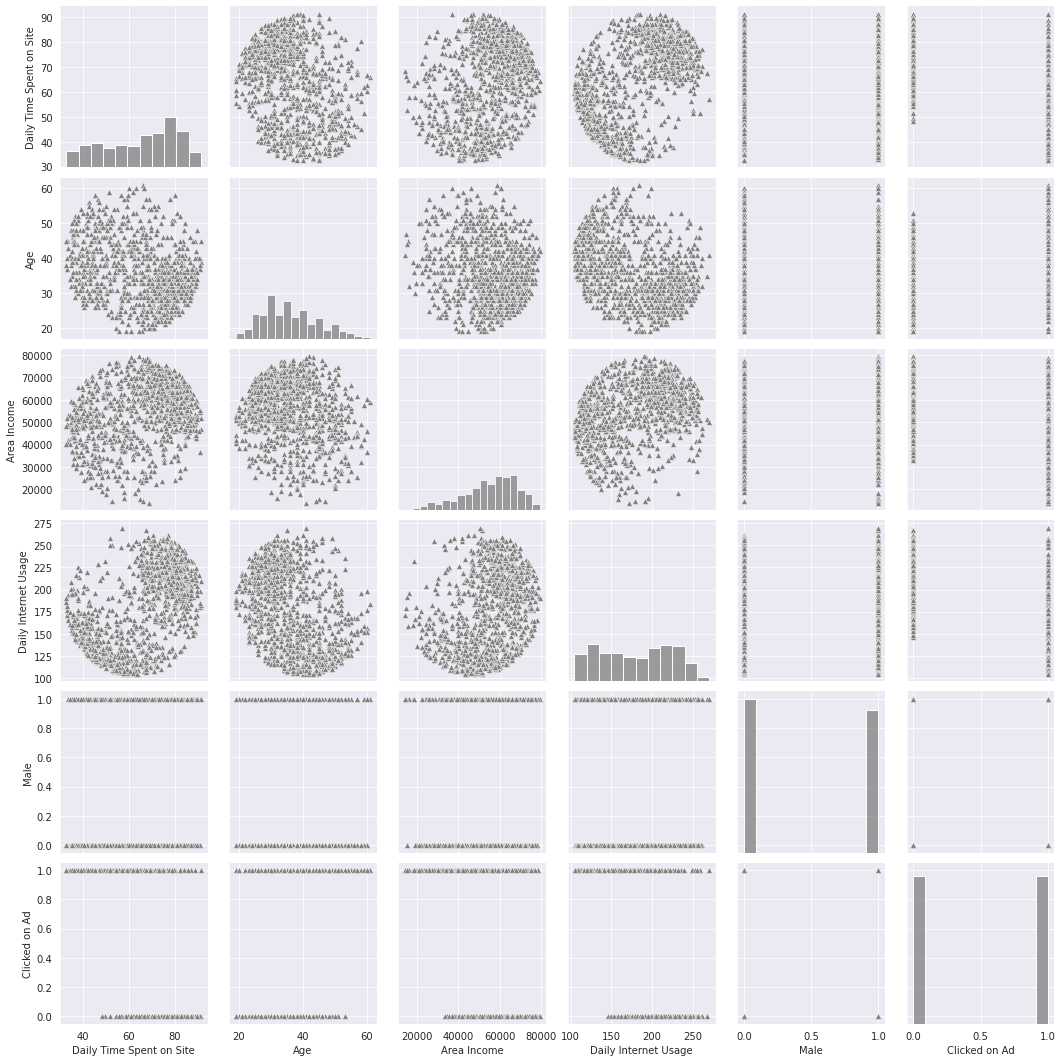

In [8]:
#Let's see an overview of how the columns are related to each other
sns.set_style("darkgrid")
sns.pairplot(data = ad_data, markers = '^', diag_kws = {"color": "grey"}, plot_kws = {"color": "grey"})
plt.show()

In [9]:
#Check count of those who clicked on ad (vs those that did not)
ad_data.pivot_table(index = 'Clicked on Ad', aggfunc = 'count' )

,Ad Topic Line,Age,Area Income,City,Country,Daily Internet Usage,Daily Time Spent on Site,Male,Timestamp
Clicked on Ad,,,,,,,,,
0,500,500,500,500,500,500,500,500,500
1,500,500,500,500,500,500,500,500,500


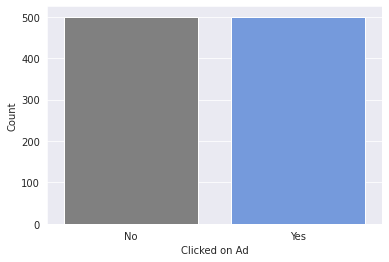

In [10]:
sns.countplot(x = 'Clicked on Ad', data = ad_data, palette = ['grey', 'cornflowerblue'])
plt.xticks([0,1],['No', 'Yes'])
plt.ylabel("Count")
plt.show()

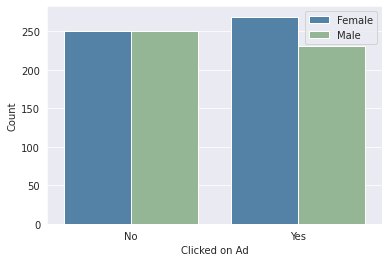

In [11]:
sns.countplot(x = 'Clicked on Ad', hue = 'Male', data = ad_data, palette = ['steelblue', 'darkseagreen'])
plt.xticks([0,1],['No', 'Yes'])
plt.legend(['Female', 'Male'])
plt.ylabel("Count")
plt.show()

There is an equal amount of people who clicked on the ad and who did not click on the ad(500/500). However, there were more women who clicked on the ad than men.

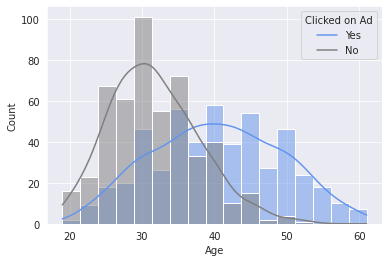

In [12]:
sns.histplot(x = 'Age', data = ad_data, kde = True, hue = "Clicked on Ad", palette = ['grey', 'cornflowerblue'])
plt.legend(title = 'Clicked on Ad', labels = ['Yes', 'No'])
plt.show()

Those who clicked on the ad seem to be concentrated around the 35-55 year age group. While those who did not click on the ad are concentrated between the 25-35 age group.

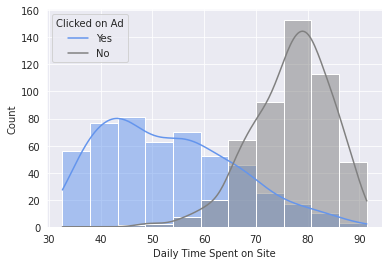

In [13]:
sns.histplot(x = 'Daily Time Spent on Site', data = ad_data, hue = 'Clicked on Ad', kde = True, palette = ['grey', 'cornflowerblue'])
plt.legend(title = 'Clicked on Ad', labels = ['Yes', 'No'])
plt.show()

Those who clicked on the ad spent less time (overall) on the site. While those who spent a longer time (overall) on the site did not click on the ad. 

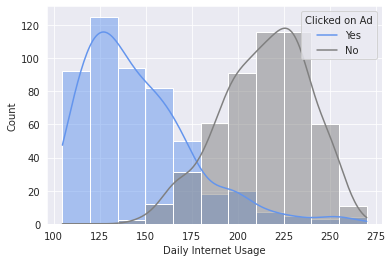

In [14]:
sns.histplot(x = 'Daily Internet Usage', data = ad_data, hue = 'Clicked on Ad', kde = True, palette = ['grey', 'cornflowerblue'])
plt.legend(title = 'Clicked on Ad', labels = ['Yes', 'No'])
plt.show()

Those who clicked on the ad spend less time (daily) on the internet. While those who did not click on the ad spend more time on the internet.

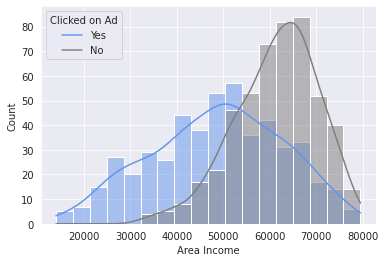

In [15]:
sns.histplot(x = 'Area Income', data = ad_data, hue = 'Clicked on Ad', kde = True, palette = ['grey', 'cornflowerblue'])
plt.legend(title = 'Clicked on Ad', labels = ['Yes', 'No'])
plt.show()

The area income seems to be fairly spread out for those who clicked on the ad (where the biggest concetration is around 40000 - 60000). While those who chose not to click on the ad are heavily conetrated around 55000 - 75000. 

#Task 7: Conceptualize the problem

We want to determine what factors indicate whether or not a person clicks on an ad. 

In order to create the logistic model, we first need to convert all non-numeric varaibles to numeric and drop the not need columns. 

In [16]:
#There are no columns that need to be converted to dummy variables.
#Drop not needed columns
ad_data.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis = 1, inplace = True)

In [17]:
ad_data.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0


#Task 8: Perform Data-Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
#Train Test Split:
X_train, X_test, Y_train, Y_test = train_test_split(ad_data.drop('Clicked on Ad', axis = 1), ad_data['Clicked on Ad'], test_size = 0.30, random_state = 101)

#Task 9: Choose the ML Method to follow

In [20]:
#Logisitic Regression
from sklearn.linear_model import LogisticRegression

#Task 10: Train the ML Model

In [21]:
#Training the logsitic model
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)

LogisticRegression()

#Task 11: Test the Model

In [22]:
predictions = logmodel.predict(X_test)

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



Now we can test the model with an examle. Let's create the profile of someone who is most likely to click on the ad:
1. Spends a short time on the site (40-60 mins)
2. Is female
3. In their 40-50s
4. Has an area income of 40000-60000
5. Their daily internet usage of about 110-170 mins

In [25]:
user = pd.DataFrame({'Daily Time Spend on Site': [50], 'Age': [45], 'Area Income': [50000], 'Daily Internet Usage': [140], 'Male': [0]})
user

,Daily Time Spend on Site,Age,Area Income,Daily Internet Usage,Male
0,50,45,50000,140,0


In [26]:
print(logmodel.predict(user))

[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Daily Time Spend on Site
Feature names seen at fit time, yet now missing:
- Daily Time Spent on Site

  warnings.warn(message, FutureWarning)


The model seems to run smoothly and accurately predicted that this user would click on the ad. 